Dataset Shape: (27901, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration              

/tmp/ipython-input-4132227650.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)



Cleaned dataset saved as 'cleaned_student_depression_dataset.csv'


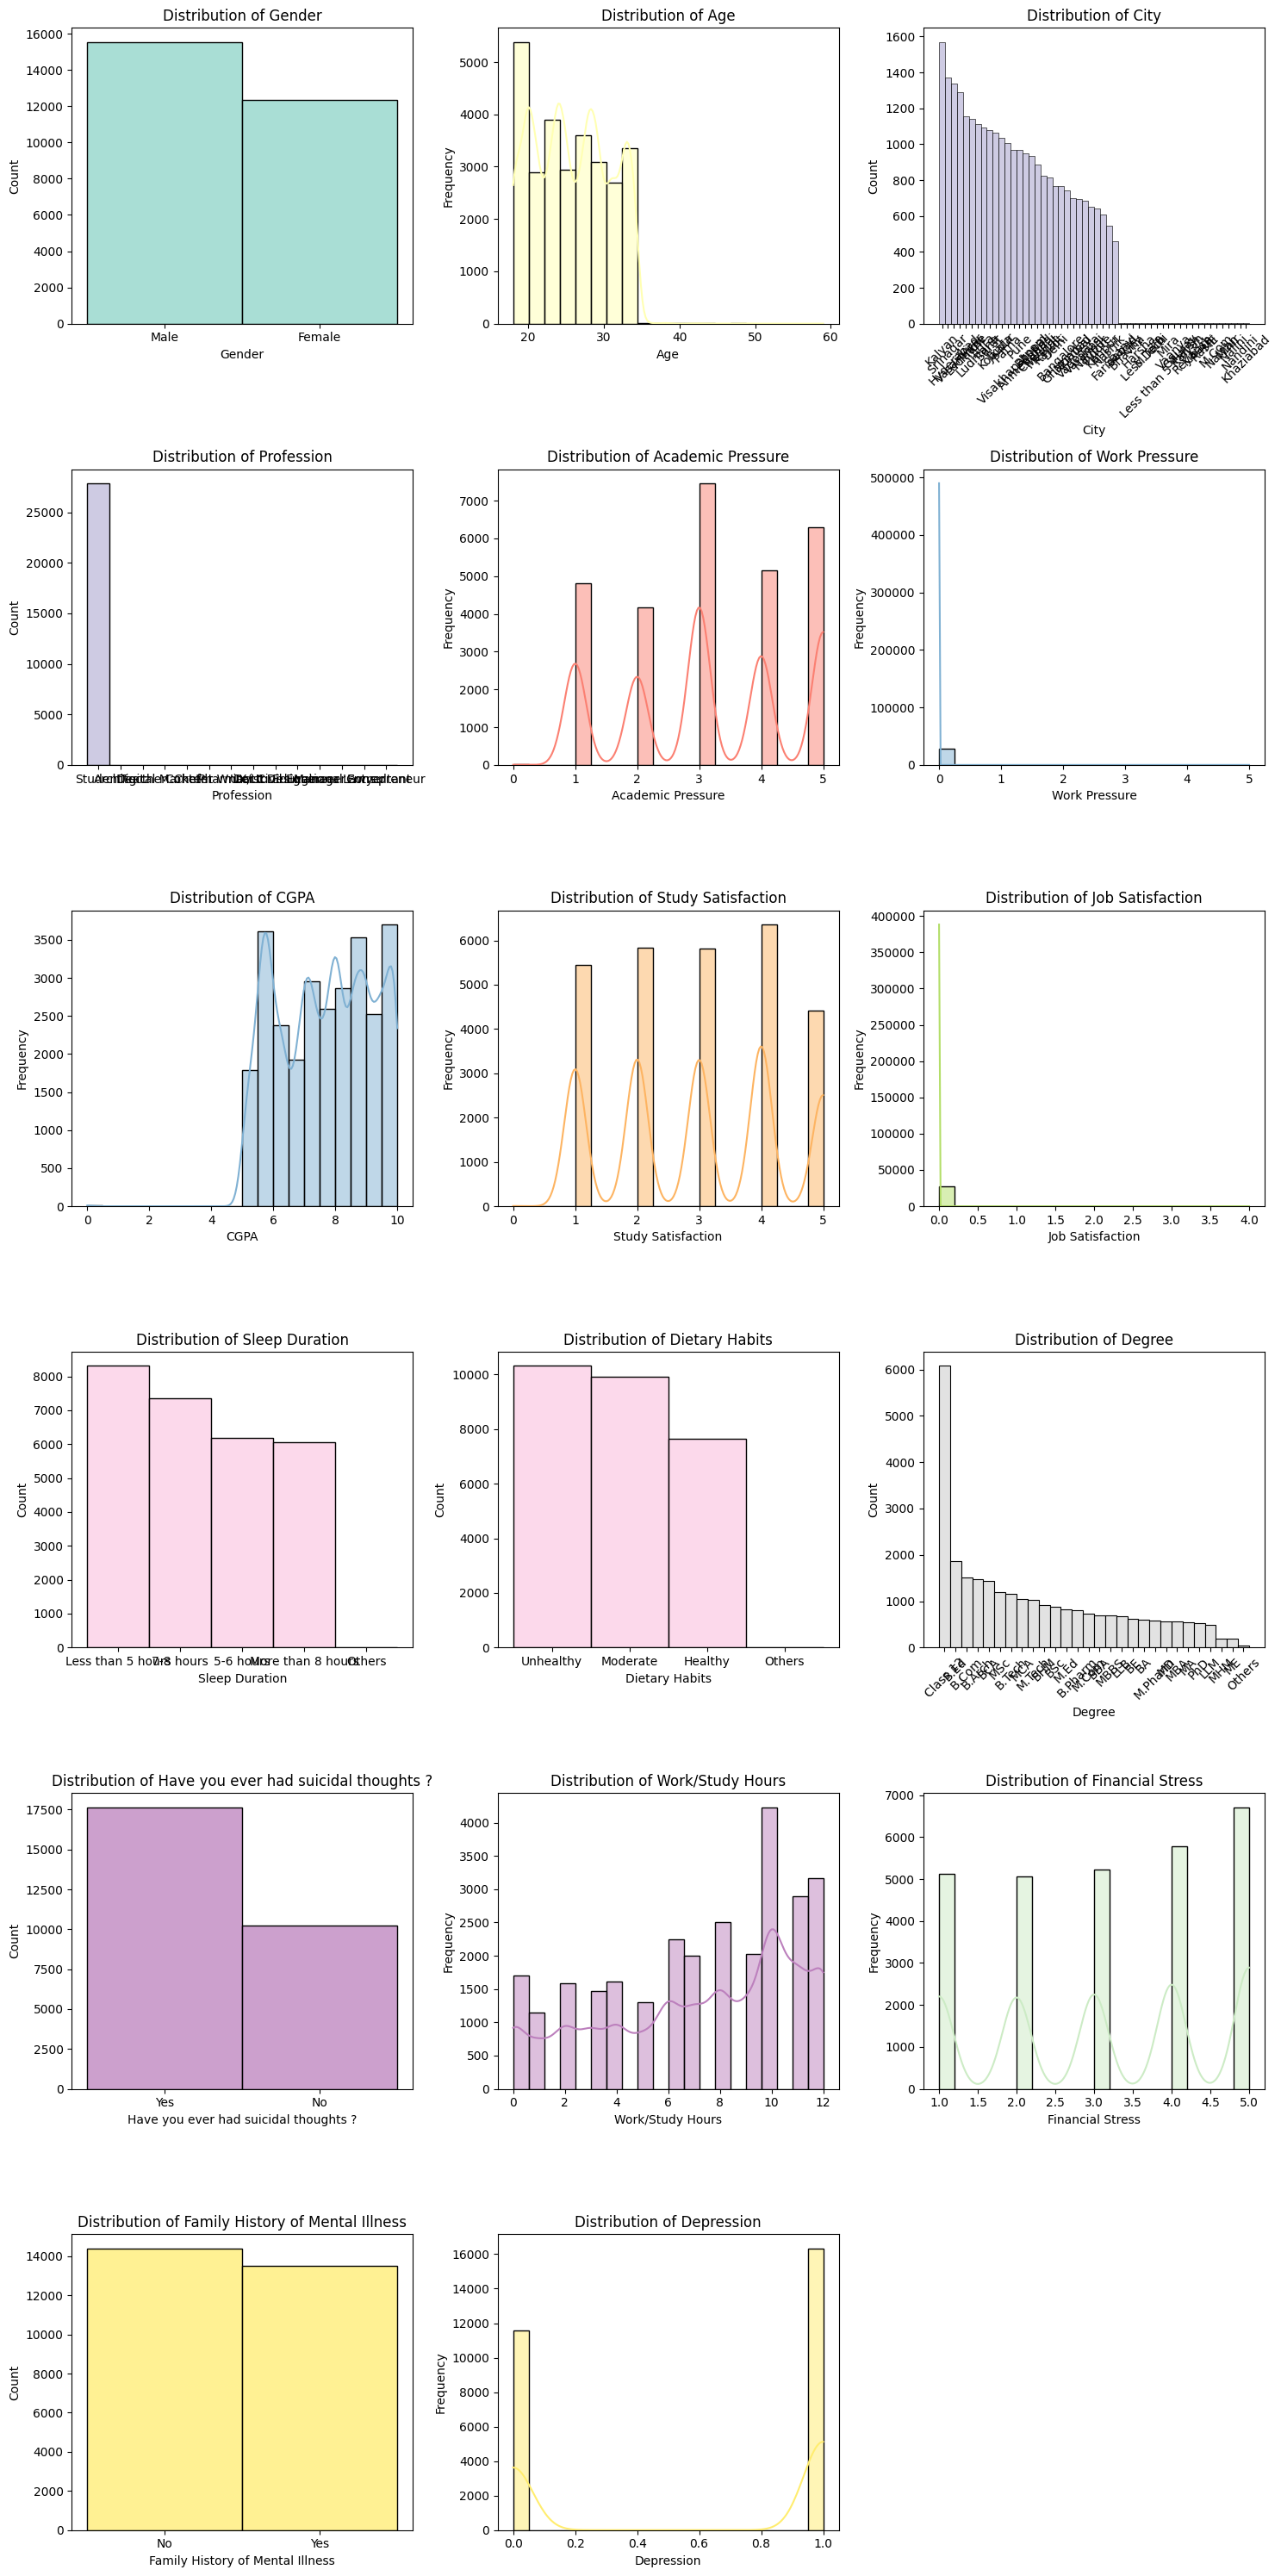

In [1]:
####1.Missing Data Handling & Encoding


##1.Data Cleaning (Missing & Duplicate Handling)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import os
import seaborn as sns

df = pd.read_csv('Student Depression Dataset.csv')


# Display basic info:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# Step 1: Check for Missing Values
missing_values = df.isna().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100
print("\nMissing Values Percentage:")
print(missing_percent)

# Handling Missing Values
if missing_values.sum() > 0:
    # Numerical columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        if missing_values[col] > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # Categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if missing_values[col] > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

    print("\nMissing Values After Handling:")
    print(df.isna().sum())
else:
    print("\nNo missing values found. No imputation needed.")

# Step 2: Check for Duplicates
duplicates_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates_count)

# Handling Duplicates
if duplicates_count > 0:
    df = df.drop_duplicates()
    print("\nDuplicates Removed. New Shape:", df.shape)
else:
    print("\nNo duplicates found. No removal needed.")

# Save the cleaned dataset (for group pipeline integration)
df.to_csv('cleaned_student_depression_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_student_depression_dataset.csv'")



## EDA Visualizations for Handeling Missing Data

# List of all columns (excluding 'id')
all_cols = ['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure',
            'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
            'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
            'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness',
            'Depression']

# Create a figure with subplots
n_cols = len(all_cols)
n_rows = (n_cols + 2) // 3
plt.figure(figsize=(15, 5 * n_rows))

# Generate histograms for each column
for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, 3, i)
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        sns.histplot(data=df, x=col, bins=20, kde=True, color=plt.cm.Set3(i / n_cols))
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:  # Categorical/Binary columns
        # Create a DataFrame with value counts and use the original column name
        cat_data = df[col].value_counts().reset_index()
        cat_data.columns = [col, 'count'] # Rename columns
        sns.histplot(data=cat_data, x=col, weights='count',
                     color=plt.cm.Set3(i / n_cols), discrete=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45 if col == 'City' or col == 'Degree' else 0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_1'
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(output_dir, 'all_columns_histogram.png'))
plt.show()




In [2]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00


Original Dataset (First 5 Rows of Categorical Columns):
   gender suicidal_thoughts family_history profession     sleep_duration  \
0    Male               Yes             No    Student          5-6 hours   
1  Female                No            Yes    Student          5-6 hours   
2    Male                No            Yes    Student  Less than 5 hours   
3  Female               Yes            Yes    Student          7-8 hours   
4  Female               Yes             No    Student          5-6 hours   

  dietary_habits   degree           city  
0        Healthy  B.Pharm  Visakhapatnam  
1       Moderate      BSc      Bangalore  
2        Healthy       BA       Srinagar  
3       Moderate      BCA       Varanasi  
4       Moderate   M.Tech         Jaipur  

gender Encoding Mapping: {'Female': np.int64(0), 'Male': np.int64(1)}

suicidal_thoughts Encoding Mapping: {'No': np.int64(0), 'Yes': np.int64(1)}

family_history Encoding Mapping: {'No': np.int64(0), 'Yes': np.int64(1)}

--- On

/tmp/ipython-input-919440670.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
/tmp/ipython-input-919440670.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
/tmp/ipython-input-919440670.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
/tmp/ipython-input-919440670.py:136: FutureWarning: 

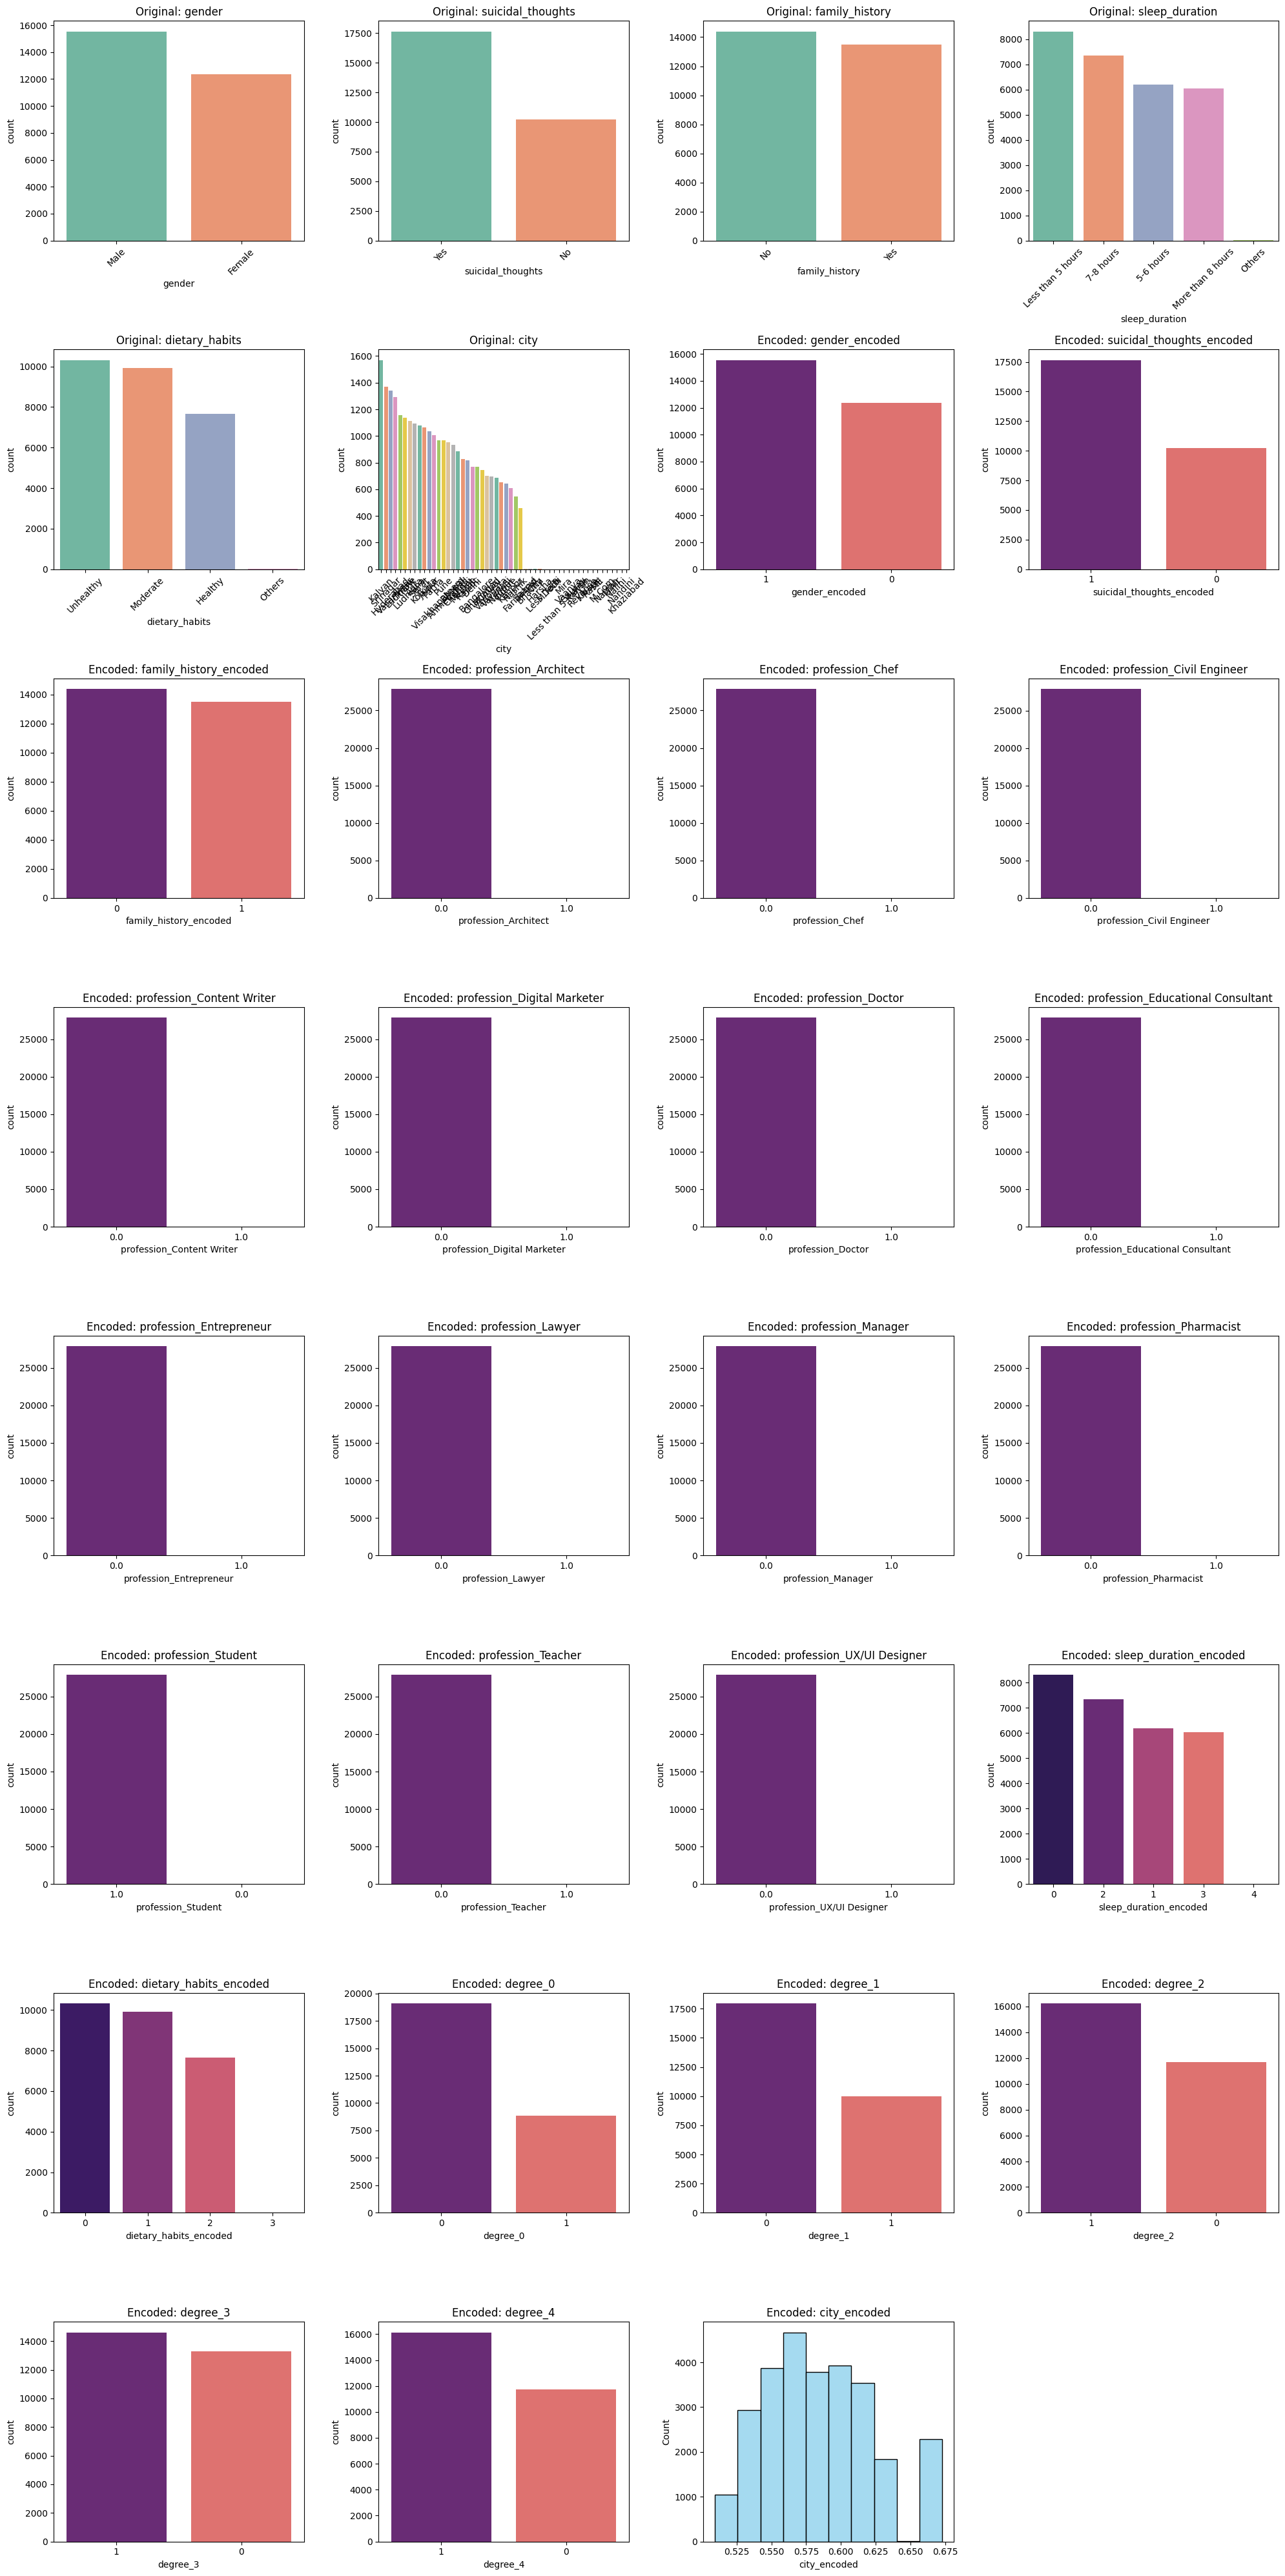


Fully encoded dataset (containing only encoded and non-categorical columns) saved as 'fully_encoded_student_depression_dataset.csv'


In [5]:
##2.Encoding Categorical Variables

try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    from category_encoders import BinaryEncoder, TargetEncoder
except ImportError as e:
    print(f"Error: Missing library - {e}. Install with: pip install pandas matplotlib seaborn scikit-learn category_encoders")
    exit()

# Load the dataset with error handling
try:
    df = pd.read_csv('cleaned_student_depression_dataset.csv')
    if df.empty:
        raise ValueError("Dataset is empty. Check file path or content.")
except FileNotFoundError:
    print("Error: 'cleaned_student_depression_dataset.csv' not found. Ensure it exists in the working directory.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Rename categorical columns for clarity and consistency
column_renames = {
    'Gender': 'gender',
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Family History of Mental Illness': 'family_history',
    'Profession': 'profession',
    'Sleep Duration': 'sleep_duration',
    'Dietary Habits': 'dietary_habits',
    'Degree': 'degree',
    'City': 'city'
}
df.rename(columns=column_renames, inplace=True)

# Define categorical columns and verify their presence
cat_cols = ['gender', 'suicidal_thoughts', 'family_history', 'profession', 'sleep_duration', 'dietary_habits', 'degree', 'city']
missing_cols = [col for col in cat_cols if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are missing from the dataset: {missing_cols}")
    exit()

# Display original data sample
print("Original Dataset (First 5 Rows of Categorical Columns):")
print(df[cat_cols].head())

# --- Encoding Section ---

# 1. Label Encoding: Binary columns (gender, suicidal_thoughts, family_history)
le = LabelEncoder()
label_cols = ['gender', 'suicidal_thoughts', 'family_history']
for col in label_cols:
    if col in df.columns:
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        print(f"\n{col} Encoding Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    else:
        print(f"Warning: {col} not found, skipping label encoding.")

# 2. One-Hot Encoding: profession
print("\n--- One-Hot Encoding ---")
print("Column: profession")
if 'profession' in df.columns:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ohe_encoded = ohe.fit_transform(df[['profession']])
    ohe_cols = ohe.get_feature_names_out(['profession'])
    ohe_df_encoded = pd.DataFrame(ohe_encoded, columns=ohe_cols, index=df.index)
    df = pd.concat([df, ohe_df_encoded], axis=1)
    df.drop('profession', axis=1, inplace=True)
    print("\nOne-Hot Encoded Columns (First 5 Rows):")
    print(df[ohe_cols].head())
else:
    print("Warning: 'profession' not found, skipping One-Hot Encoding.")

# 3. Ordinal Encoding: sleep_duration, dietary_habits
ordinal_mapping_sleep = {'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3, 'Others': 4}
ordinal_mapping_diet = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2, 'Others': 3}
if 'sleep_duration' in df.columns:
    df['sleep_duration_encoded'] = df['sleep_duration'].map(ordinal_mapping_sleep).astype('Int64')
if 'dietary_habits' in df.columns:
    df['dietary_habits_encoded'] = df['dietary_habits'].map(ordinal_mapping_diet).astype('Int64')
print("\nOrdinal Encoded Columns Added (sleep_duration_encoded, dietary_habits_encoded):")
print(df[['sleep_duration_encoded', 'dietary_habits_encoded']].head())

# 4. Binary Encoding: degree
try:
    if 'degree' in df.columns:
        be = BinaryEncoder(cols=['degree'])
        df_binary = be.fit_transform(df[['degree']])
        df = pd.concat([df, df_binary], axis=1)
        df.drop('degree', axis=1, inplace=True)
        binary_cols = [col for col in df_binary.columns if col.startswith('degree_')]
        print("\nBinary Encoded Degree Columns Added:", binary_cols)
        print(df[binary_cols].head())
    else:
        print("Warning: 'degree' not found, skipping Binary Encoding.")
except Exception as e:
    print(f"Error in Binary Encoding: {e}. Ensure category_encoders is installed.")
    exit()

# 5. Target Encoding: city (assuming 'Depression' is the target column)
try:
    if 'city' in df.columns and 'Depression' in df.columns:
        te = TargetEncoder(cols=['city'])
        df['city_encoded'] = te.fit_transform(df[['city']], df['Depression'])
        print("\nTarget Encoded City Column Added (city_encoded):")
        print(df[['city_encoded']].head())
    else:
        print("Warning: 'city' or 'Depression' not found, skipping Target Encoding.")
except Exception as e:
    print(f"Error in Target Encoding: {e}. Check target variable 'Depression' or install category_encoders.")
    exit()

# Display encoded dataset snippet
encoded_cols = [col for col in df.columns if '_encoded' in col or col.startswith('profession_') or col.startswith('degree_')]
print("\nEncoded Dataset (First 5 Rows of Encoded Columns):")
print(df[encoded_cols].head())



##EDA Visualizations for All Categorical Columns

# Create subplots for original and encoded categorical columns
original_cols = [col for col in cat_cols if col in df.columns]
n_cols = len(original_cols)
encoded_cols = [col for col in df.columns if '_encoded' in col or col.startswith('profession_') or col.startswith('degree_')]
n_encoded = len(encoded_cols)
total_plots = n_cols + n_encoded
n_rows = (total_plots + 3) // 4
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))
axes = axes.ravel()

# Plot original categorical columns
for i, col in enumerate(original_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
    axes[i].set_title(f'Original: {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Plot encoded categorical columns
for i, col in enumerate(encoded_cols):
    if 'city_encoded' in col:
        sns.histplot(df[col], bins=10, ax=axes[i + n_cols], color='skyblue')
    else:
        sns.countplot(x=col, data=df, ax=axes[i + n_cols], palette='magma', order=df[col].value_counts().index)
    axes[i + n_cols].set_title(f'Encoded: {col}')
    axes[i + n_cols].tick_params(axis='x', rotation=0)

# Remove unused subplots
for j in range(total_plots, len(axes)):
    axes[j].remove()

plt.tight_layout()



# Save the visualizations
plt.savefig('results/eda_visualizations/member_1/categorical_encoding_visualizations.png')
plt.show()

# Select only encoded columns and non-categorical columns (e.g., 'Depression') for saving
non_categorical_cols = [col for col in df.columns if col not in cat_cols and col not in encoded_cols]  # e.g., 'Depression'
final_cols = encoded_cols + non_categorical_cols
df_encoded_only = df[final_cols]

# Save the fully encoded dataset with only encoded columns and non-categorical columns
df_encoded_only.to_csv('fully_encoded_student_depression_dataset.csv', index=False)
print("\nFully encoded dataset (containing only encoded and non-categorical columns) saved as 'fully_encoded_student_depression_dataset.csv'")